# 1. Abstract

We will use different machine leaning techniques for predicting house prices with Python programming language and number of its packages. Then after having a clean dataset of houses, we build a simple recommender system that suggests best houses to a customer or estimates a house price using our fitted model. Our dataset contains house prices and their features in Ames city provided by De Cock at http://www.kaggle.com/prevek18/ames-housing-dataset.

Keywords: House price prediction, forecasting using machine learning algorithm, Recommendation of house according to user choice.

# 2. Introduction

House pricing is an important topic that worries most people, because we can never predict exact prices according to neighborhood and facilities.

In this paper we are trying to build a Machin learning model to predict house prices and then we try to build a recommender system for house buyers. We will use Ames dataset that contains information of houses and their different features and we will use Python programming language with a number of Python packages.

# 3. Defining the Problem


We are dividing the problem into two parts:


1.   First part – building a model that predicts the house prices with best accuracy. Which contains three steps. 

  First step: we take a look at our data and we preprocess it then we’ll find a solution for missing values and outliers.

  Second step: we do some feature engineering and build a model to predict house prices.

  Third step: we define a metric to evaluate the performance of models.

2.   
Second part – presenting a recommender system that a customer can find the best house with having only a certain amount of budget, neighborhood, house area in square feet, land usage, house age and number of bedrooms.









# 4. Methodology 

## 4.1  Data Description
Here we have housing dataset presented by De Cock (2011). Dataset contains house prices and features in Ames, Iowa from 2006 until 2010.


### 4.1.1 Getting a feel of the dataset




First we import all the libraries we need.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.stats import norm 
from scipy import stats
from sklearn import svm
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
color = sns.color_palette()
sns.set_style('darkgrid')

Now we read our dataset, take a copy from it just in case if it comes handy later.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# First Step : DATA PRE PROCESSING:

df_train = pd.read_csv(r'/content/drive/MyDrive/train_data.csv') 
df_test = pd.read_csv(r'/content/drive/MyDrive/test_data.csv') 
df_train_c = df_train.copy()
df_test_c = df_test.copy()

print("\n train columns", df_train_c.columns) 
print("\n train head", df_train_c.head(5)) 
print("\n train types", df_train_c.dtypes)
print("\n train describe", df_train_c.describe()) 
print("\n train shape", df_train_c.shape)

print("\n test columns", df_test_c.columns) 
print("\n test columns", df_test_c.head(5)) 
print("\n test columns", df_test_c.dtypes) 
print("\n test columns", df_test_c.describe()) 
print("\n test shape", df_test_c.shape)


 train columns Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       '

Our train dataset contains 1314 records(rows) and our test dataset has 1605 records. And we have 79 features in both our train and test datasets. Train dataset also has house prices in addition.

First let’s take a look at features and its description.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky">Feature</th>
    <th class="tg-0pky">Description</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">MSSubClass</td>
    <td class="tg-0pky">The type of the house involved in the sale </td>
  </tr>
    <tr>
    <td class="tg-0pky"> MSZoning</td>
    <td class="tg-0pky">The general zoning classification of the saledd</td>
  </tr>  <tr>
    <td class="tg-0pky"> LotFrontage</td>
    <td class="tg-0pky">Linear feet of street connected to the house</td>
  </tr>  <tr>
    <td class="tg-0pky"> LotArea</td>
    <td class="tg-0pky">Lot size in square feet</td>
  </tr>  <tr>
    <td class="tg-0pky"> Street</td>
    <td class="tg-0pky">Type of road access to the house</td>
  </tr>  <tr>
    <td class="tg-0pky">Alley </td>
    <td class="tg-0pky">Type of alley access to the house</td>
  </tr>  <tr>
    <td class="tg-0pky">LotShape</td>
    <td class="tg-0pky">General shape of the house</td>
  </tr>  <tr>
    <td class="tg-0pky"> LandContour</td>
    <td class="tg-0pky">House flatness</td>
  </tr>  <tr>
    <td class="tg-0pky"> Utilities</td>
    <td class="tg-0pky">Type of utilities available</td>
  </tr>  <tr>
    <td class="tg-0pky"> LotConfig</td>
    <td class="tg-0pky">Lot configuration</td>
  </tr>  <tr>
    <td class="tg-0pky"> LandSlope </td>
    <td class="tg-0pky">House Slope</td>
  </tr>  <tr>
    <td class="tg-0pky">Neighborhood </td>
    <td class="tg-0pky">Locations within Ames city limits</td>
  </tr>  <tr>
    <td class="tg-0pky">Condition1</td>
    <td class="tg-0pky">Proximity to various conditions</td>
  </tr>  <tr>
    <td class="tg-0pky"> Condition2 </td>
    <td class="tg-0pky">Proximity to various conditions (if more than one is present)</td>
  </tr>
    </tr>  <tr>
    <td class="tg-0pky">BldgType</td>
    <td class="tg-0pky">House type</td>
  </tr>  <tr>
    <td class="tg-0pky"> HouseStyle</td>
    <td class="tg-0pky">House style</td>
  </tr>  <tr>
    <td class="tg-0pky"> OverallQual </td>
    <td class="tg-0pky">Overall quality of material and finish of the house</td>
  </tr>  <tr>
    <td class="tg-0pky">OverallCond</td>
    <td class="tg-0pky">Overall condition of the house</td>
  </tr>  <tr>
    <td class="tg-0pky"> YearBuilt</td>
    <td class="tg-0pky">Construction year</td>
  </tr>  <tr>
    <td class="tg-0pky"> YearRemodAdd </td>
    <td class="tg-0pky">Remodel year (if no remodeling nor addition, same as YearBuilt)</td>
  </tr>  <tr>
    <td class="tg-0pky">RoofStyle </td>
    <td class="tg-0pky">Roof type</td>
  </tr>  <tr>
    <td class="tg-0pky">RoofMatl </td>
    <td class="tg-0pky">Roof material</td>
  </tr>  <tr>
    <td class="tg-0pky">Exterior1st</td>
    <td class="tg-0pky">Exterior covering on house</td>
  </tr>  <tr>
    <td class="tg-0pky">Exterior2nd</td>
    <td class="tg-0pky">Exterior covering on house (if more than one material)</td>
  </tr>  <tr>
    <td class="tg-0pky"> MasVnrType</td>
    <td class="tg-0pky">Type of masonry veneer</td>
  </tr>  <tr>
    <td class="tg-0pky">MasVnrArea</td>
    <td class="tg-0pky">Masonry veneer area in square feet</td>
  </tr>  <tr>  
    <td class="tg-0pky">ExterQual</td>
    <td class="tg-0pky">Quality of the material on the exterior</td>
  </tr>  <tr> 
    <td class="tg-0pky">ExterCond</td>
    <td class="tg-0pky">Condition of the material on the exterior</td>
  </tr>  <tr>  
    <td class="tg-0pky">Foundation </td>
    <td class="tg-0pky">Foundation type</td>
  </tr>  <tr>
    <td class="tg-0pky">BsmtQual</td>
    <td class="tg-0pky">Basement height</td>
  </tr>  <tr>  
    <td class="tg-0pky">BsmtCond</td>
    <td class="tg-0pky">Basement Condition</td>
  </tr>  <tr>
    <td class="tg-0pky"> BsmtExposure</td>
    <td class="tg-0pky">Refers to walkout or garden level walls</td>
  </tr>  <tr>  
    <td class="tg-0pky">BsmtFinType1 </td>
    <td class="tg-0pky">Rating of basement finished area</td>
  </tr>  <tr>
    <td class="tg-0pky">BsmtFinSF1 </td>
    <td class="tg-0pky">Type 1 finished square feet</td>
  </tr>  <tr>
    <td class="tg-0pky">BsmtFinType2 </td>
    <td class="tg-0pky">Rating of basement finished area (if multiple types)</td>
  </tr>  <tr>  
    <td class="tg-0pky">BsmtFinSF2</td>
    <td class="tg-0pky">Type 2 finished square feet</td>
  </tr>  <tr>
    <td class="tg-0pky">BsmtUnfSF </td>
    <td class="tg-0pky">Unfinished basement area in square feet</td>
  </tr>  <tr>
    <td class="tg-0pky">TotalBsmtSF </td>
    <td class="tg-0pky">Total basement area in square feet</td>
  </tr>  <tr>
    <td class="tg-0pky">Heating</td>
    <td class="tg-0pky">Heating type</td>
  </tr>  <tr>  
    <td class="tg-0pky">HeatingQC </td>
    <td class="tg-0pky">Heating quality and condition</td>
  </tr>  <tr> 
    <td class="tg-0pky">CentralAir</td>
    <td class="tg-0pky">Central air conditioning</td>
  </tr> <tr>
    <td class="tg-0pky">Electrical</td>
    <td class="tg-0pky">Electrical system type</td>
  </tr> <tr>
    <td class="tg-0pky">1stFlrSF</td>
    <td class="tg-0pky">First floor area in square feet</td>
  </tr> <tr>
    <td class="tg-0pky">2ndFlrSF</td>
    <td class="tg-0pky">Second floor area in square feet</td>
  </tr> <tr> 
    <td class="tg-0pky">LowQualFinSF</td>
    <td class="tg-0pky">Low quality finished square feet in all floors</td>
  </tr> <tr>
    <td class="tg-0pky">GrLivArea</td>
    <td class="tg-0pky">Above-ground living area in square feet</td>
  </tr> <tr>
    <td class="tg-0pky">BsmtFullBath</td>
    <td class="tg-0pky">Basement full bathrooms</td>
  </tr> <tr> 
    <td class="tg-0pky">BsmtHalfBath</td>
    <td class="tg-0pky">Basement half bathrooms</td>
  </tr> <tr>
    <td class="tg-0pky">FullBath</td>
    <td class="tg-0pky">Full bathrooms above ground</td>
  </tr> <tr>
    <td class="tg-0pky">HalfBath</td>
    <td class="tg-0pky">Half bathrooms above ground</td>
  </tr> <tr> 
    <td class="tg-0pky">Bedroom</td>
    <td class="tg-0pky">Bedrooms above ground</td>
  </tr> <tr>
    <td class="tg-0pky">Kitchen</td>
    <td class="tg-0pky">Kitchens above ground</td>
  </tr> <tr>
    <td class="tg-0pky">KitchenQual</td>
    <td class="tg-0pky">Kitchen quality</td>
  </tr> <tr>   
    <td class="tg-0pky">TotRmsAbvGrd</td>
    <td class="tg-0pky">Total rooms above ground (excluding bathrooms)</td>
  </tr> <tr> 
    <td class="tg-0pky">Functional</td>
    <td class="tg-0pky">Home functionality</td>
  </tr> <tr> 
    <td class="tg-0pky">Fireplaces</td>
    <td class="tg-0pky">Number of fireplaces</td>
  </tr> <tr> 
    <td class="tg-0pky">FireplaceQu</td>
    <td class="tg-0pky">Fireplace quality</td>
  </tr> <tr> 
    <td class="tg-0pky">GarageType</td>
    <td class="tg-0pky">Garage location</td>
  </tr> <tr> 
    <td class="tg-0pky">GarageYrBlt</td>
    <td class="tg-0pky">Year garage was built in</td>
  </tr> <tr> 
    <td class="tg-0pky">GarageFinish</td>
    <td class="tg-0pky">Interior finish of the garage</td>
  </tr> <tr> 
    <td class="tg-0pky">GarageCars</td>
    <td class="tg-0pky">Size of garage (in car capacity)</td>
  </tr> <tr>   
    <td class="tg-0pky">GarageArea</td>
    <td class="tg-0pky">Garage size in square feet</td>
  </tr> <tr> 
    <td class="tg-0pky">GarageQual</td>
    <td class="tg-0pky">Garage quality</td>
  </tr> <tr> 
    <td class="tg-0pky">GarageCond</td>
    <td class="tg-0pky">Garage condition</td>
  </tr> <tr> 
    <td class="tg-0pky">PavedDrive</td>
    <td class="tg-0pky">How driveway is paved</td>
  </tr> <tr> 
    <td class="tg-0pky">WoodDeckSF</td>
    <td class="tg-0pky">Wood deck area in square feet</td>
  </tr> <tr> 
    <td class="tg-0pky">OpenPorchSF</td>
    <td class="tg-0pky">Open porch area in square feet</td>
  </tr> <tr> 
    <td class="tg-0pky">EnclosedPorch</td>
    <td class="tg-0pky">Enclosed porch area in square feet</td>
  </tr> <tr>   
    <td class="tg-0pky">3SsnPorch</td>
    <td class="tg-0pky">Three season porch area in square feet</td>
  </tr> <tr> 
    <td class="tg-0pky">ScreenPorch</td>
    <td class="tg-0pky">Screen porch area in square feet</td>
  </tr> <tr> 
    <td class="tg-0pky">PoolArea</td>
    <td class="tg-0pky">Pool area in square feet</td>
  </tr> <tr> 
    <td class="tg-0pky">PoolQC</td>
    <td class="tg-0pky">Pool quality</td>
  </tr> <tr> 
    <td class="tg-0pky">Fence</td>
    <td class="tg-0pky">Fence quality</td>
  </tr> <tr> 
    <td class="tg-0pky">MiscFeature</td>
    <td class="tg-0pky">Miscellaneous feature</td>
  </tr> <tr> 
    <td class="tg-0pky">MiscVal</td>
    <td class="tg-0pky">Value of miscellaneous feature</td>
  </tr> <tr>    
    <td class="tg-0pky">MoSold </td>
    <td class="tg-0pky">Sale month</td>
  </tr> <tr>
    <td class="tg-0pky">YrSold</td>
    <td class="tg-0pky">Sale year</td>
  </tr> <tr>  
    <td class="tg-0pky">SaleType</td>
    <td class="tg-0pky">Sale type</td>
  </tr> <tr>  
    <td class="tg-0pky">SaleCondition</td>
    <td class="tg-0pky">Sale condition</td>
  </tr> 
    <tr>
    <th class="tg-0pky">Table 4.1: Features Description</th>
  </tr>  
</tbody>
</table>

Table 4.1 provides some information about all features used in dataset.

### 4.1.2 Finding outliers and removing them

De Cock, who provided the dataset stated there are outliers and he said removing them is the best approach. He also suggested plotting SalesPrice against GrLivArea to spot the them. We can see the plot next.

Text(0.5, 1.0, 'Figure 1: GrLivArea Against SalePrice')

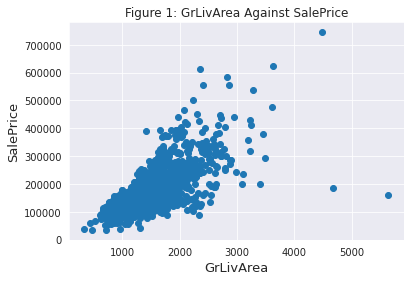

In [4]:
# outliers:
# plt.figure(1)
fig, ax = plt.subplots()
ax.scatter(x=df_train_c['GrLivArea'], y=df_train_c["SalePrice"]) 
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.title("Figure 1: GrLivArea Against SalePrice")
plt.show()




From Figure 1, we can see that we have two unusual values. With the increase of GrLivArea SalesPrice should increase too, instead the SalesPrice remains low. Now that we spot these outliers, we can remove them. We are going to draw a plot again to check if everything is fine.



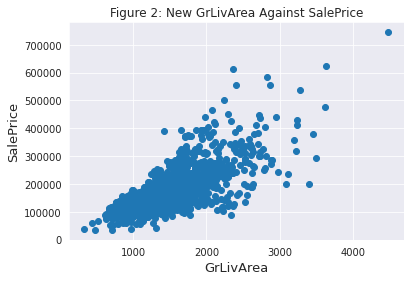

In [11]:
df_train_c = df_train_c.drop(df_train_c[(df_train_c['GrLivArea'] > 4000) & (df_train_c['SalePrice'] < 300000)].index)
fig, ax = plt.subplots()
ax.scatter(x=df_train_c['GrLivArea'], y=df_train_c["SalePrice"]) 
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.title("Figure 2: New GrLivArea Against SalePrice")
plt.show()


Now that we saw in figure 2 that we don’t have any more outliers, we’re good to go.

### 4.1.3 Correlation between variables

We want to check how the variables are correlated with each other and how predictors are correlated with the response variable.

Correlation is show as a value between -1 and +1 where +1 means the highest positive correlation, -1 means the highest negative correlation, and 0 means that there is no correlation. We will show correlation between our dataset variables and we use a heatmap graph:


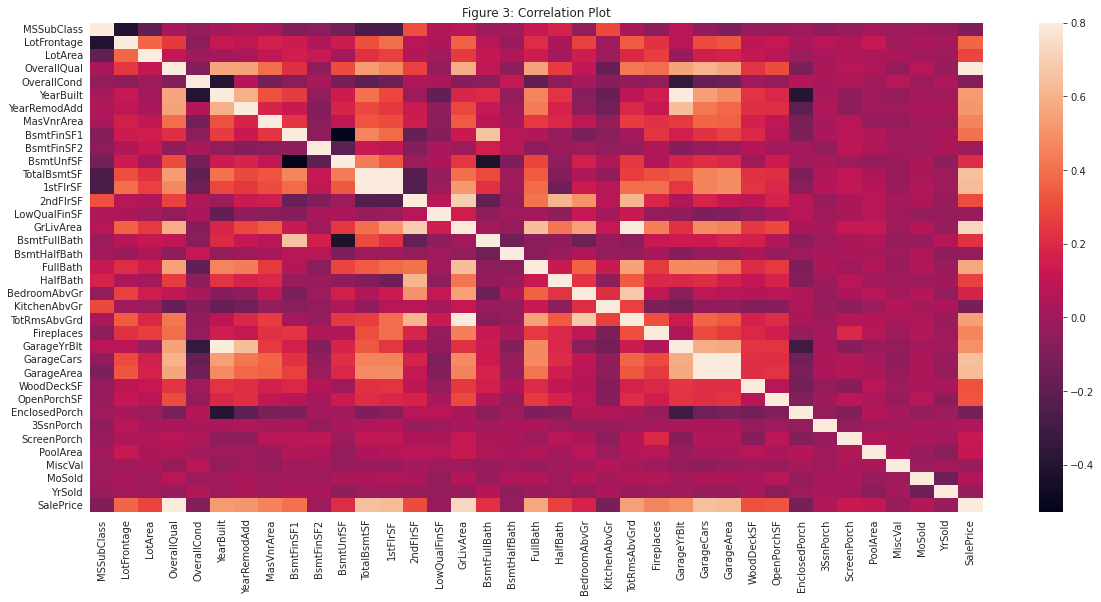

In [12]:
# Correlation plot:
# plt.figure(3)
fig, ax = plt.subplots(figsize=(20, 9)) 
sns.heatmap(df_train_c.corr(), vmax=.8) 
plt.title("Figure 3: Correlation Plot")
plt.show()


We can see in Figure 3 that most of the features are correlated with each other like Garage Cars and Garage Area. because when the garage area increases, its car capacity increases too. We see also that GrLivArea and TotRms AbvGrd are highly
positively correlated which also makes sense because when living area above ground increases, it is expected for the rooms above ground to increase too. Regarding negative correlation, we can see that BsmtUnfSF is negatively correlated with BsmtFinSF1, and that makes sense because when we have more unfinished area, this means that we have less finished area.

Let’s plot most correlated features.



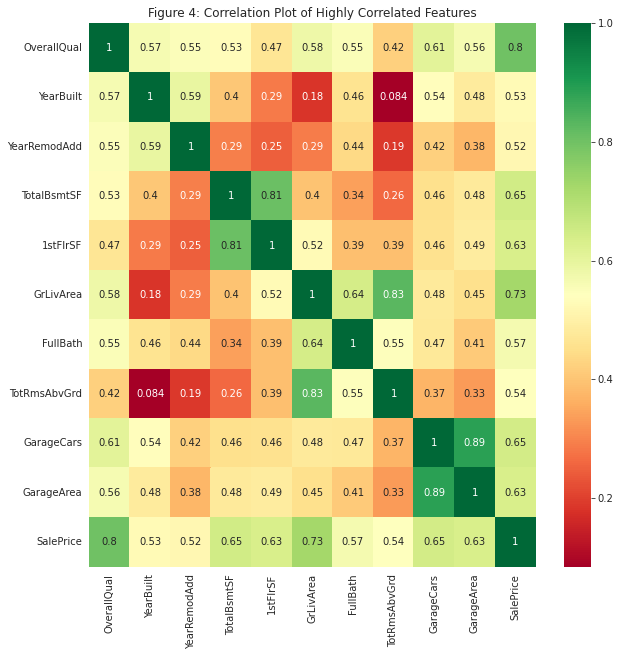

In [13]:
# features which are highly correlated to the SalePrice:
# plt.figure(4)
fig, ax = plt.subplots(figsize=(10, 10))
top_corr_features = df_train_c.corr().index[abs(df_train_c.corr()["SalePrice"])>0.5]
g= sns.heatmap(df_train_c[top_corr_features].corr(),annot=True,cmap="RdYlGn") 
plt.title("Figure 4: Correlation Plot of Highly Correlated Features")
plt.show()



As you can see in the Figure 4, GarageArea and GarageCars are highly correlated.
We explained before about these. But take a note that all the features starting with
Garage, actually derived from Garage, same rule applies to Basement. We can also
see OverallQual is highly correlated with target feature SalePrice.

## 4.2 Data Preprocessing 

### 4.2.1 Checking Sales prices distribution and normalizing it 

Later in modeling section we’re going to explain about our models, but before that we need to check if our response variable (which is SalesPrice) follows normal distribution. If it follows, then we don’t have to do anything and we can continue our work. But if not, we have to normalize them because later they’ll be needed in our model’s hypothesis.





 mu = 181321.15 and sigma = 78430.06



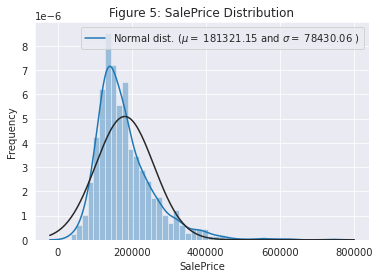

In [10]:
# checking y distribution & normalizing it:
plt.figure(5)
sns.distplot(df_train_c['SalePrice'], fit=norm)
(mu, sigma) = norm.fit(df_train_c['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma)) 
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best') 
plt.ylabel('Frequency')
plt.title('Figure 5: SalePrice Distribution')
plt.show()

First we got the fitted parameters used by the function. mu = 181321.15 and sigma = 78430.06

Then we plotted the distribution.


The black line represents normal distribution and the blue one is our SalesPrice
values. We can see that target variable is right skewed and not normally distributed.

And now we take a look at Q-Q plot.

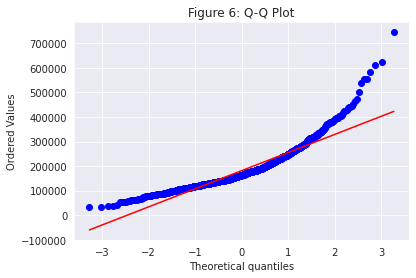

In [14]:
plt.figure(6)
res = stats.probplot(df_train_c['SalePrice'], plot=plt) 
plt.title("Figure 6: Q-Q Plot")
plt.show()



We use Q-Q plot for comparing two probability distributions by plotting their
quantiles against each other. In x-coordinate we have our theoretical distribution
which is normal here and in y-coordinate we have SalesPrice distribution. If our data
follows normal distribution, then points would fall on the red line. As we can see
target variable doesn’t follow normal distribution. And we need to transform this
variable and make it more normally distributed.
<br><br>
So how can we make it normally distributed?

We use the numpy function Log1p which applies Log(1+x) to all elements of the
SalesPrice column.





In [15]:
df_train_c['SalePrice'] = np.log1p(df_train_c['SalePrice'])

We are going to repeat all steps again so that we can be sure if the target variable is more normally distributed.




Normal distribution plot:


 mu = 12.03 and sigma = 0.40



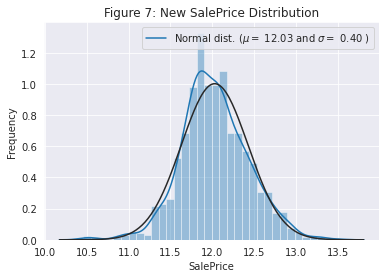

In [17]:
plt.figure(7)
sns.distplot(df_train_c['SalePrice'], fit=norm)
(mu, sigma) = norm.fit(df_train_c['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best') 
plt.ylabel('Frequency')
plt.title("Figure 7: New SalePrice Distribution")
plt.show()


fitted parameters used by the function:
mu = 12.03 and sigma = 0.40
<br>
 The skew seems now corrected. 



 Q-Q plot:


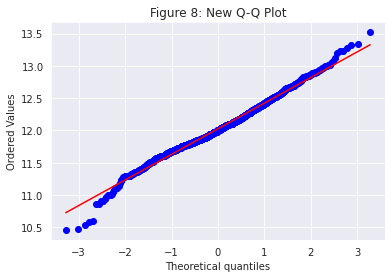

In [18]:
plt.figure(8) 
stats.probplot(df_train_c['SalePrice'], plot=plt) 
plt.title("Figure 8: New Q-Q Plot")
plt.show()


 The data appears more normally distributed.

### 4.2.2 Dealing with missing values 

We need to find a way or ways to deal with missing data and we have to go through a long process for this. Its best if we merge our train and test datasets so we can apply all preprocessing to them once. We just have to make sure that there won’t be data leakage. Data leakage happens when we merge our datasets and we use test dataset to impute missing values. And we can’t do that because it’s using the test data to impute itself so instead we will only use our train dataset for imputation.


In [19]:
# concatenating data:
ntrain = df_train_c.shape[0]
ntest = df_test_c.shape[0]
y_train = df_train_c.SalePrice.values
all_data = pd.concat((df_train_c, df_test_c)).reset_index(drop=True)


First let’s take a look at our missing values. 


In [20]:
# dealing with missing values:
percent = (all_data.isna().sum()/all_data.isna().count()).sort_values(ascending=False)
total = all_data.isna().sum().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print("\n data missing values before pre processing\n", missing_data.head(35))



 data missing values before pre processing
               Total  Percent
PoolQC         2908    0.997
MiscFeature    2812    0.964
Alley          2719    0.932
Fence          2346    0.804
SalePrice      1605    0.550
FireplaceQu    1420    0.487
LotFrontage     486    0.167
GarageCond      159    0.055
GarageYrBlt     159    0.055
GarageQual      159    0.055
GarageFinish    159    0.055
GarageType      157    0.054
BsmtCond         82    0.028
BsmtExposure     82    0.028
BsmtQual         81    0.028
BsmtFinType2     80    0.027
BsmtFinType1     79    0.027
MasVnrType       24    0.008
MasVnrArea       23    0.008
MSZoning          4    0.001
Utilities         2    0.001
Functional        2    0.001
BsmtFullBath      2    0.001
BsmtHalfBath      2    0.001
GarageCars        1    0.000
BsmtFinSF2        1    0.000
Exterior2nd       1    0.000
GarageArea        1    0.000
TotalBsmtSF       1    0.000
BsmtUnfSF         1    0.000
BsmtFinSF1        1    0.000
Exterior1st       1    0.00



data missing values:
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0lax">Feature</th>
    <th class="tg-0lax">Total</th>
    <th class="tg-0lax">Percent</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0lax">PoolQC</td>
    <td class="tg-0lax">2908  </td>
    <td class="tg-0lax">0.997</td>
  </tr>
  <tr>
    <td class="tg-0lax">MiscFeature </td>
    <td class="tg-0lax">2812 </td>
    <td class="tg-0lax">0.964 </td>
  </tr>
  <tr>
    <td class="tg-0lax">Alley</td>
    <td class="tg-0lax">2719  </td>
    <td class="tg-0lax">0. 932</td>
  </tr>
  <tr>
    <td class="tg-0lax">Fence</td>
    <td class="tg-0lax">2346 </td>
    <td class="tg-0lax">0.804 </td>
  </tr>
  <tr>
    <td class="tg-0lax">SalePrice</td>
    <td class="tg-0lax">1605  </td>
    <td class="tg-0lax">0.550</td>
  </tr>
  <tr>
    <td class="tg-0lax">FireplaceQu</td>
    <td class="tg-0lax">1420  </td>
    <td class="tg-0lax">0.487</td>
  </tr>
  <tr>
    <td class="tg-0lax">LotFrontage</td>
    <td class="tg-0lax">486 </td>
    <td class="tg-0lax">0.167 </td>
  </tr>
  <tr>
    <td class="tg-0lax">GarageCond</td>
    <td class="tg-0lax">159 </td>
    <td class="tg-0lax">0.055</td>
  </tr>
  <tr>
    <td class="tg-0lax">GarageYrBlt</td>
    <td class="tg-0lax">159 </td>
    <td class="tg-0lax">0.055</td>
  </tr>
  <tr>
    <td class="tg-0lax">GarageQual</td>
    <td class="tg-0lax">159  </td>
    <td class="tg-0lax">0.055</td>
  </tr>
  <tr>
    <td class="tg-0lax">GarageFinish</td>
    <td class="tg-0lax">159  </td>
    <td class="tg-0lax">0.055</td>
  </tr>
  <tr>
    <td class="tg-0lax">GarageType</td>
    <td class="tg-0lax">157  </td>
    <td class="tg-0lax">0.054</td>
  </tr>
  <tr>
    <td class="tg-0lax">BsmtCond</td>
    <td class="tg-0lax">82  </td>
    <td class="tg-0lax">0.028</td>
  </tr>
  <tr>
    <td class="tg-0lax">BsmtExposure</td>
    <td class="tg-0lax">82  </td>
    <td class="tg-0lax">0.028</td>
  </tr>
  <tr>
    <td class="tg-0lax">BsmtQual</td>
    <td class="tg-0lax">81  </td>
    <td class="tg-0lax">0.028</td>
  </tr>
  <tr>
    <td class="tg-0lax">BsmtFinType2</td>
    <td class="tg-0lax">80 </td>
    <td class="tg-0lax">0.027</td>
  </tr>
  <tr>
    <td class="tg-0lax">BsmtFinType1</td>
    <td class="tg-0lax">79 </td>
    <td class="tg-0lax">0.027</td>
  </tr>
  <tr>
    <td class="tg-0lax">MasVnrType</td>
    <td class="tg-0lax">24</td>
    <td class="tg-0lax">0.008</td>
  </tr>
  <tr>
    <td class="tg-0lax">MasVnrArea</td>
    <td class="tg-0lax">23</td>
    <td class="tg-0lax">0.008</td>
  </tr>
  <tr>
    <td class="tg-0lax">MSZoning</td>
    <td class="tg-0lax">4</td>
    <td class="tg-0lax">0.001</td>
  </tr>
  <tr>
    <td class="tg-0lax">Utilities</td>
    <td class="tg-0lax">2</td>
    <td class="tg-0lax">0.001</td>
  </tr>
  <tr>
    <td class="tg-0lax">Functional</td>
    <td class="tg-0lax">2</td>
    <td class="tg-0lax">0.001</td>
  </tr>
  <tr>
    <td class="tg-0lax">BsmtFullBath</td>
    <td class="tg-0lax">2</td>
    <td class="tg-0lax">0.001</td>
  </tr>
  <tr>
    <td class="tg-0lax">BsmtHalfBath</td>
    <td class="tg-0lax">2</td>
    <td class="tg-0lax">0.001</td>
  </tr>
  <tr>
    <td class="tg-0lax">GarageCars</td>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">0.000</td>
  </tr>
  <tr>
    <td class="tg-0lax">BsmtFinSF2</td>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">0.000</td>
  </tr>
  <tr>
    <td class="tg-0lax">Exterior2nd</td>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">0.000</td>
  </tr>
  <tr>
    <td class="tg-0lax">GarageArea</td>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">0.000</td>
  </tr>
  <tr>
    <td class="tg-0lax">TotalBsmtSF</td>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">0.000</td>
  </tr>
  <tr>
    <td class="tg-0lax">BsmtUnfSF</td>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">0.000</td>
  </tr>
  <tr>
    <td class="tg-0lax">BsmtFinSF1</td>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">0.000</td>
  </tr>
  <tr>
    <td class="tg-0lax">Exterior1st</td>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">0.000</td>
  </tr>
  <tr>
    <td class="tg-0lax">KitchenQual</td>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">0.000</td>
  </tr>
  <tr>
    <td class="tg-0lax">SaleType</td>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">0.000</td>
  </tr>
  <tr>
    <td class="tg-0lax">Electrical</td>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">0.000</td>
  </tr>
  <tr>
    <th class="tg-0pky"> Table 4.2: Missing value’s </th>
    <th>number </th>
    <th>and percentage</th>
  </tr>  
</tbody>
</table>


We are going to have different approaches for different variables.

We can see that in variables PoolQC, MiscFeature, Alley and Fence more than 80% of the data and in FireplaceQu almost half of the data is missing. So we can’t really make use out of them since our models can’t propel learn them so we drop these columns.

In [21]:
all_data = all_data.drop(["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu"], axis=1)


Then we have missing values in SalesPrice which is for test dataset and we need to predict them, so we move on.

Look at numeric variables like MasVnrArea, GarageYrBlt, GarageArea, GarageCars, BsmtFinSF1, BsmtUnfSF, BsmtFinSF2, TotalBsmtSF, BsmtHalfBath and BsmtFullBath. We can fill missing values in these variables with 0, as missing values means not having that feature like not having Masonry veneer area or basement or garage.

In [22]:
for i in ["MasVnrArea", "GarageYrBlt", "GarageArea", "GarageCars", "BsmtFinSF1", "BsmtUnfSF", "BsmtFinSF2", "TotalBsmtSF", "BsmtHalfBath", "BsmtFullBath"]:
  all_data[i] = all_data[i].fillna(0)

For categorical variables like MasVnrType, GarageCond, GarageType, GarageFinish, GarageQual, BsmtExposure, BsmtFinType2, BsmtFinType1, BsmtCond and BsmtQual, still missing values means lack of that feature. But we can’t fill them with 0 since they’re string. So we fill them instead with “Unknown”. This makes all these missing values classified in a class.

In [23]:
for i in ["MasVnrType", "GarageCond", "GarageType", "GarageFinish", "GarageQual", "BsmtExposure", "BsmtFinType2", "BsmtFinType1", "BsmtCond", "BsmtQual"]:
  all_data[i] = all_data[i].fillna("Unknown")


We have 2 missing values in Functional column. In description we got to know missing data means Typical class, so we fill them with “Typ”.

In [24]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

Next we have some categorical features that missing values doesn’t mean lack of the feature, like MSZoning, Electrical, KitchenQual, Exterior1st, Exterior2nd, SaleType and Utilities. We will fill these missing data with the most frequent vales of the
feature. Right now we just need to make sure that we will use the most frequent value from train dataset so there won’t be data leakage.

In [25]:
for i in ["MSZoning", "Electrical", "KitchenQual", "Exterior1st", "Exterior2nd", "SaleType", "Utilities"]:
  all_data[i] = all_data[i].fillna(df_train_c[i].mode()[0])









Then we have 486 missing values in LotFrontage and we should fill them with mean/mode/median of LotFrontage value from train dataset. Again we use train dataset to prevent data leakage. But let’s decide on which one to use. We can put each of the three values and compare model scores and then choose the best one. Later we will talk about these scores in Performance metric section in Model Building. But as for let’s just say the smaller the score, the better.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky"></th>
    <th class="tg-0pky">Mean</th>
    <th class="tg-0pky">Median</th>
    <th class="tg-0pky">Mode</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">Lasso</td>
    <td class="tg-0pky">0.1200 (0.0125)</td>
    <td class="tg-0pky">0.1200 (0.0125)</td>
    <td class="tg-0pky">0.1201 (0.0126)</td>
  </tr>
  <tr>
    <td class="tg-0pky">ElasticNet</td>
    <td class="tg-0pky">0.1201 (0.0127)</td>
    <td class="tg-0pky">score: 0.1201 (0.0127)</td>
    <td class="tg-0pky">0.1201 (0.0127)</td>
  </tr>
  <tr>
    <td class="tg-0pky">Kernel Ridge</td>
    <td class="tg-0pky">0.1221 (0.0141)</td>
    <td class="tg-0pky">score: 0.1221 (0.0141)</td>
    <td class="tg-0pky">0.1221 (0.0142)</td>
  </tr>
  <tr>
    <td class="tg-0pky">Decision Tree</td>
    <td class="tg-0pky">0.1936 (0.0075)</td>
    <td class="tg-0pky"> 0.1909 (0.0088)</td>
    <td class="tg-0pky">0.1902 (0.0083)</td>
  </tr>
  <tr>
    <td class="tg-0pky">XGB Regression</td>
    <td class="tg-0pky">0.1891 (0.0088)</td>
    <td class="tg-0pky">0.1906 (0.0082)</td>
    <td class="tg-0pky">0.1896 (0.0092)</td>
  </tr>
  <tr>
    <td class="tg-0pky">Random Forest</td>
    <td class="tg-0pky">0.1918 (0.0083)</td>
    <td class="tg-0pky">0.1926 (0.0082)</td>
    <td class="tg-0pky">0.1907 (0.0080)</td>
  </tr>
  <th>Table 4.3: Scores for different LotFrontage</th>
</tbody>
</table>

Now based on table 4.3 we decide to fill the missing values with mode.

In [26]:
all_data["LotFrontage"] = all_data["LotFrontage"].fillna(df_train_c["LotFrontage"].mode()[0])

In [27]:
print("\n data missing values after pre processing\n",
all_data.isnull().sum().sort_values(ascending=False)[:35]) 
print(pd.DataFrame(y_train).isna().sum())


 data missing values after pre processing
 SalePrice       1605
YearRemodAdd       0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
RoofStyle          0
YearBuilt          0
TotalBsmtSF        0
OverallCond        0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
dtype: int64
0    0
dtype: int64


After we checked, there's no more missing values. 

### 4.2.3 Deleting unimportant columns.

There are some unimportant columns in our dataset which the frequency of one unique value is a lot higher than other values, this makes these variables not useful for our learning. Now we write a loop that searches and shows us which column has a value with frequency more than 97%. We only search in variables with object type.

In [28]:
# not useful features:
object_columns_df = pd.DataFrame(all_data.select_dtypes(include=['object'])) 
print(object_columns_df.head())
for i in object_columns_df.columns:
  if  max(object_columns_df[i].value_counts()/object_columns_df[i].value_counts( ).sum()) > 0.97:
      print(i)


  MSZoning Street LotShape  ... PavedDrive SaleType SaleCondition
0       RL   Pave      Reg  ...          Y       WD        Normal
1       RL   Pave      Reg  ...          Y       WD        Normal
2       RL   Pave      IR1  ...          Y       WD        Normal
3       RL   Pave      IR1  ...          Y       WD       Abnorml
4       RL   Pave      IR1  ...          Y       WD        Normal

[5 rows x 38 columns]
Street
Utilities
Condition2
RoofMatl
Heating




Now we remove these columns.

In [29]:
all_data = all_data.drop(['Street', 'Utilities', 'Condition2', 'RoofMatl',
'Heating'], axis=1)

## 4.3 Feature Engineering 

### 4.3.1 Creating new derived features 

In order to have better performance we can derive new features. We don’t have any variable that contains total area of the house, we only have area of basement, first and second floor. Let’s make this new variable. By adding TotalBsmtSF, 1stFlrSF and 2ndFlrSF together we make TotalSF as a new feature.


In [30]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']


Another feature that we can add to our data is total number of bathrooms. We have two half bathroom variables and two full baths. We add them up but we need to multiply number of half baths by 0.5, and that makes new variable TotalBath.

In [31]:
all_data['TotalBath'] = all_data['FullBath'] + all_data['HalfBath']*0.5 + all_data['BsmtFullBath'] + all_data['BsmtFullBath']*0.5



We can also create Total_porch_sf, meaning total porch area; by adding OpenPorchSF, 3SsnPorch, EnclosedPorch, ScreenPorch and WoodDeckSF together. But later after modeling we got back to here and test our results with and without this feature. Results showed that not adding this feature is better, so we won’t.




In [ ]:
# all_data['Total_porch_sf'] = (all_data['OpenPorchSF'] + all_data['3SsnPorch'] + all_data['EnclosedPorch'] + all_data['ScreenPorch'] +all_data['WoodDeckSF'])

We need to derive house age from out data. We do this by subtracting YearBuilt from YrSold. Now we check this new feature.


In [32]:
all_data["HouseAge"] = (all_data['YrSold'] - all_data['YearBuilt']) 
print(all_data["HouseAge"].describe()) 

count   2917.000
mean      36.505
std       30.332
min       -1.000
25%        7.000
50%       35.000
75%       55.000
max      136.000
Name: HouseAge, dtype: float64


As we can see there is unusual value here, as the minimum is -1. We try to find this
row and some information about it.

In [33]:
print(all_data.iloc[np.where(all_data["HouseAge"] == -1)]["YearBuilt"]) 
print(all_data.iloc[np.where(all_data["HouseAge"] == -1)]["YrSold"]) 
print(all_data.iloc[np.where(all_data["HouseAge"] == -1)]["YearRemodAdd"])

2401    2008
Name: YearBuilt, dtype: int64
2401    2007
Name: YrSold, dtype: int64
2401    2009
Name: YearRemodAdd, dtype: int64


So it must have been a typo that this house was sold before it’s was built but we can
correct this. We change this row’s YrSold with 2009. We should write this line
before adding this feature.

In [34]:
all_data.loc[all_data['YrSold'] < all_data['YearBuilt'], 'YrSold'] = 2009 
all_data["HouseAge"] = (all_data['YrSold'] - all_data['YearBuilt']) 
print(all_data["HouseAge"].describe()) 

count   2917.000
mean      36.506
std       30.331
min        0.000
25%        7.000
50%       35.000
75%       55.000
max      136.000
Name: HouseAge, dtype: float64


Now that we are done with new features. We can take a look and see there are some
features that are originally a string but we set them with numeric type. Variables like
MSSubClass, OverallCond, YrSold and MoSold should be strings. And that makes
them having different classes.

In [35]:
for i in ["MSSubClass", "OverallCond", "YrSold", "MoSold"]: 
  all_data[i] = all_data[i].apply(str)

Now we take a copy from our data because we will use it in second part of the
problem.

In [36]:
all_data_c = all_data.copy()

### 4.3.2 Dealing with ordinal variables 


There are some ordinal features in our dataset and so we can’t use the typical label
encoder. Instead we are going to define their orders and then give them to
OrdinalEncoder from Preprocessing folder in Sklearn package. Our ordinal variables
are Msclass, ExterQual, LotShape, BsmtQual, BsmtCond, BsmtExposure, 
BsmtFinType1, BsmtFinType2, HeatingQC, Functional, FireplaceQu, KitchenQual,
GarageFinish, GarageQual, GarageCond, PoolQC and Fence. We define their orders
using description which was provided with datasets. 

In [37]:
orders=[#msclass ['20','30','40','45','50','60','70','75','80','85', '90','120','150','160','180','190'],
#ExterQual ['Fa','TA','Gd','Ex'], #LotShape ['Reg','IR1' ,'IR2','IR3'], #BsmtQual ['None','Fa','TA','Gd','Ex'],
#BsmtCond ['None','Po','Fa','TA','Gd','Ex'],  #BsmtExposure ['None','No','Mn','Av','Gd'],
# #BsmtFinType1 ['None','Unf','LwQ', 'Rec','BLQ','ALQ' , 'GLQ' ], #BsmtFinType2 ['None','Unf','LwQ', 'Rec','BLQ','ALQ' , 'GLQ' ],
 # #HeatingQC ['Po','Fa','TA','Gd','Ex'], #Functional ['Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'],
# #FireplaceQu ['None','Po','Fa','TA','Gd','Ex'], #KitchenQual ['Fa','TA','Gd','Ex'], #GarageFinish ['None','Unf','RFn','Fin'],
# #GarageQual ['None','Po','Fa','TA','Gd','Ex'], #GarageCond ['None','Po','Fa','TA','Gd','Ex'], #PoolQC ['None','Fa','Gd','Ex'],
# #Fence ['None','MnWw','GdWo','MnPrv','GdPrv']
]

And then we write a loop to
transform these variables.

In [38]:
for i in range(len(orders)):
  ord_en = OrdinalEncoder(categories={0: orders[i]})
  all_data.loc[:, ord_fields[i]] = ord_en.fit_transform(all_data.loc[:, ord_fields[i]].values.reshape(-1, 1))

### 4.3.3 One-Hot encoding for categorical variables 

Machine learning models only accept numbers as their input and we have some
categorical features that we didn’t encode. There is a cool one-hot encoding
technique which transforms the categorical variable into a number of binary
variables based on the number of unique categories in the categorical variable; each
of the resulting binary variables has only 0 and 1 as its possible values. we can use
get_dummies function in Pandas package that will do the work for us.

In [39]:
all_data = pd.get_dummies(all_data, drop_first=True)

## 4.4 Model Building


### 4.4.1 Preparation for modeling 


We need to separate the train and test datasets for modeling, and we do so. 

In [40]:
train = pd.DataFrame(all_data[:ntrain])
test = pd.DataFrame(all_data[ntrain:])

Next step we use a function in Model_selection folder from Sklearn package to split
our train dataset randomly so we can have training dataset to train our model and a
test dataset to evaluate the model.

We also need to use an scaler to scale our data, so we use RobustScaler from preprocessing in Sklearn package.
!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [41]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('SalePrice', axis=1), train[['SalePrice']], test_size=0.2, random_state=3)

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.fit_transform(X_test)

### 4.4.2 Searching for effective parameters 


For each of our models there are parameters that we need to estimate its value, that
makes lots of combinations of those parameters. In order to get best results we should
try each combination and then choose the one that gives best score. Sklearn provides
the function for us in Model_selection folder, it’s called GridSearchCV. We just
need to give the possible parameters to the function then it tries all combinations and
give us parameters with best scores. Later in Results we will show you all the best
parameters.

### 4.4.3 Performance metric

We use the cross_val_score function from Model_selection folder in Sklearn. But
because cross_val_score doesn’t have shuffle attribute; we add one line and write 
our own function. When we chose our scoring as “neg_mean_squared_error”, it
gives us negative value of mean of squared errors. So have to multiply this by a
negative so we have the positive value. Now if we take its square root, makes its
RMSE. So by now we have RMSE which is Root Mean Squared Error. But if we
pay attention we transformed our target response previously into logarithmic, and
sow now our metric is Root Mean Squared Logarithmic Error (RMSLE).

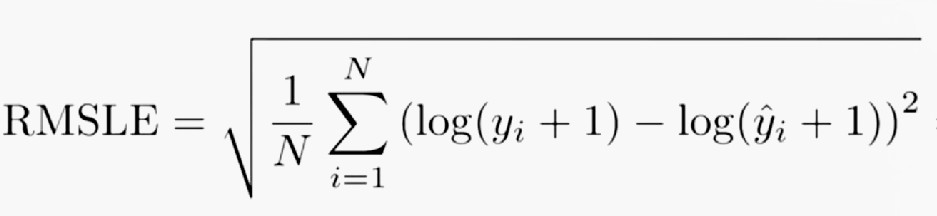


# 5. Results

## 5.1 Model Assumptions


Before building a multiple linear regression model, we need to check that these
assumptions below are valid.

### 5.1.1 Linearity 


We need the relationship between each independent variable and the
dependent variable to be linear for linear regression. We can test this assumption
with scatter plot or we can check residual plot, which tells us how is the error
variance across the true line. Before in 4.2.1 we transformed our target variable, now
we can just check linearity with a residual plot. 

<Figure size 432x288 with 0 Axes>

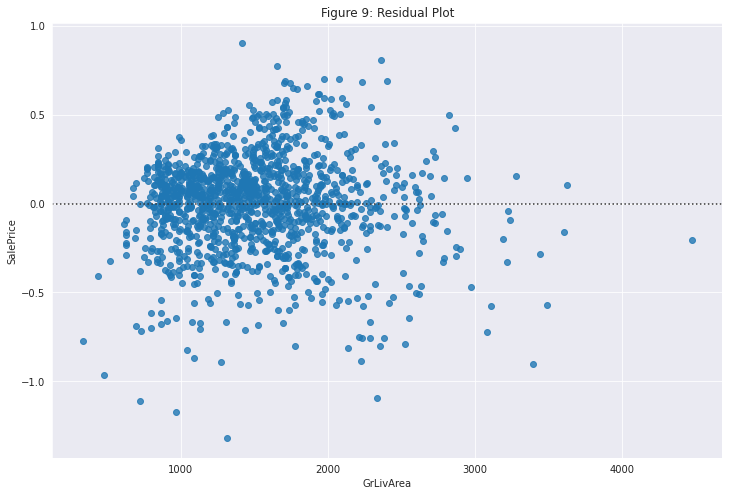

In [42]:
plt.figure(9)
plt.subplots(figsize = (12,8)) 
sns.residplot(df_train_c.GrLivArea, df_train_c.SalePrice) 
plt.title("Figure 9: Residual Plot")
plt.show()

Ideally, if the assumptions are met, the residuals will be randomly scattered around
the centerline of zero with no apparent pattern. We can see that there isn’t any pattern
that these points are following. So we can move to next assumption.

### 5.1.2 Homoscedasticity 


Homoscedasticity describes a situation in which the error or random disturbance in
the relationship between the independent variables and the dependent variable is the
same across all values of the independent variable. If the noise is not the same across
the values of an independent variable unlike our residual plot above (Figure 10), we
call that Heteroscedasticity, it is the opposite of Homoscedasticity. One way to fix
Heteroscedasticity is by using a transformation method like log-transformation,
which we did before. 

### 5.1.3 Multivariate Normality 


Let’s check multivariate normality (normality of errors). The linear regression
analysis requires the dependent variable to be multivariate normally distributed. A
histogram, box plot, or a Q-Q-Plot can check if the target variable is normally 
distributed. In chapter 4.2.1 we checked normality of target variables in Figures 5
till 8.

### 5.1.4 Absence of correlated errors

We checked the correlation between variables in 4.1.3.

## 5.2 Modeling and Evaluation 


First we are going to apply GridSearchCV as we talked about before and determine
best parameters, we’ll use them in next step.


### 5.2.1 Lasso 


In [ ]:
lasso_reg = Lasso()
lasso_parameters = {'alpha': np.arange(0.0001, 0.005, 0.0001)} 
grid_lasso = GridSearchCV(estimator=lasso_reg, param_grid=lasso_parameters, cv=5)
grid_lasso.fit(X_train, y_train) 
print("Best parameter provided by GridSearchCV is:", grid_lasso.best_params_)

Best parameter provided by GridSearchCV is: {'alpha': 0.00030000000000000003}


### 5.2.2 Elastic Net


In [ ]:
EN = ElasticNet()
ElasticNet_parameters = {'alpha': np.arange(0.0001, 0.0006, 0.0001), 'l1_ratio': np.arange(0.5, 1, 0.1), 'random_state': [1, 2, 3]} 
grid_ElasticNet = GridSearchCV(estimator=EN, param_grid=ElasticNet_parameters, cv=5)
grid_ElasticNet.fit(X_train, y_train) 
print("Best parameter provided by GridSearchCV is:", grid_ElasticNet.best_params_)

Best parameter provided by GridSearchCV is: {'alpha': 0.0004, 'l1_ratio': 0.7999999999999999, 'random_state': 1}


### 5.2.3 Kernel Ridge 


In [ ]:
KRR = KernelRidge()
KRR_parameters = {'alpha': np.arange(0.1, 1, 0.1),'kernel': ['polynomial', 'rbf', 'linear'], 'degree': [1, 2], 'coef0':np.arange(1, 5, 0.5)}
grid_KRR = GridSearchCV(estimator=KRR, param_grid=KRR_parameters, cv=5) 
grid_KRR.fit(X_train, y_train)
print("Best parameter provided by GridSearchCV is:", grid_KRR.best_params_)

Best parameter provided by GridSearchCV is: {'alpha': 0.1, 'coef0': 4.5, 'degree': 1, 'kernel': 'polynomial'}


### 5.2.4 Decision Tree 


In [ ]:
DT = DecisionTreeRegressor(random_state=3)
DT_parameters = {"criterion": ["mse", "friedman_mse", "mae"], "min_samples_split": [5, 18, 29, 50], "min_samples_leaf": [3, 7, 15, 25],
                 "max_features": [20, 50, 150, 200, X_train.shape[1]]}
grid_DT = GridSearchCV(DT, DT_parameters, cv=5, scoring="neg_mean_absolute_error", n_jobs=4)
grid_DT.fit(X_train, y_train) 
print("Best parameter provided by GridSearchCV is:", grid_DT.best_params_)

Best parameter provided by GridSearchCV is: {'criterion': 'friedman_mse', 'max_features': 200, 'min_samples_leaf': 7, 'min_samples_split': 18}


### 5.2.5 XGBoost Regression


In [ ]:
XGB = XGBRegressor(random_state=3)
XGB_parameters = {"max_depth": [4, 5, 6], "learning_rate": [0.005, 0.009, 0.01], "n_estimators": [700, 1000, 2500], "booster": ["gbtree",], 
                  "gamma":[7, 25, 100], "subsample": [0.3, 0.6], "colsample_bytree": [0.5, 0.7], "colsample_bylevel": [0.5, 0.7,], 
                  "reg_alpha": [1, 10, 33], "reg_lambda": [1, 3, 10]}
grid_XGB = RandomizedSearchCV(XGB, XGB_parameters, cv=3, n_jobs=4, scoring="neg_mean_absolute_error", random_state=3, n_iter=10)
grid_XGB.fit(X_train, y_train) 
print("Best parameter provided by GridSearchCV is:", grid_XGB.best_params_)

[11:47:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best parameter provided by GridSearchCV is: {'subsample': 0.6, 'reg_lambda': 3, 'reg_alpha': 10, 'n_estimators': 2500, 'max_depth': 6, 'learning_rate': 0.005, 'gamma': 7, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.7, 'booster': 'gbtree'}


### 5.2.6 Random Forest

In [ ]:
RF = RandomForestRegressor(random_state=3)
RF_parameters = {"n_estimators": [10, 100, 300, 600], "criterion": ["mse", "mae"], "max_depth": [7, 50, 254], "min_samples_split": [2, 5], 
                 "min_samples_leaf": [1, 5], "max_features": [19, 100, X_train.shape[1]], "bootstrap": [True, False]}
grid_RF = RandomizedSearchCV(RF, RF_parameters, cv=3, n_jobs=4, scoring="neg_mean_absolute_error", n_iter=10, random_state=3) 
grid_RF.fit(X_train, y_train)
print("Best parameter provided by GridSearchCV is:", grid_RF.best_params_)

Best parameter provided by GridSearchCV is: {'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 19, 'max_depth': 254, 'criterion': 'mse', 'bootstrap': False}


### 5.2.7 Running Models


Then we need to fit our models using these parameters that GridSearchCV gave us.
In order to do so first we define some empty arrays so later we can fill them with
mean and standard deviation of scores from Performance metric that we chose. 

We write a loop, at first we split the train and test data, then we need to scale our
X_train and X_test, we use RobustScaler in Preprocessing folder in Sklearn package.
Then we use the function we wrote in Performance Metric to calculate rmsle scores,
later in each model we append mean and standard deviation of these scores to
assigned arrays.

After the loop finishes, we print out score’s mean and score’s sd. 

In [ ]:
lasso_score_mean = np.empty(500) 
lasso_score_std = np.empty(500) 
ElasticNet_score_mean = np.empty(500) 
ElasticNet_score_std = np.empty(500) 
KRR_score_mean = np.empty(500) 
KRR_score_std = np.empty(500) 
DT_score_mean = np.empty(500) 
DT_score_std = np.empty(500) 
XGB_score_mean = np.empty(500) 
XGB_score_std = np.empty(500) 
RF_score_mean = np.empty(500) 
RF_score_std = np.empty(500)

counter = -1
for i in range(500):
    print(i)
    counter = counter+1
    X_train, X_test, y_train, y_test = train_test_split(train.drop('SalePrice', axis=1), train[['SalePrice']], test_size=0.2, random_state=3)
    X_train = scaler.fit_transform(X_train) 
    X_test = scaler.transform(X_test)
    n_folds = 5
    def rmsle_cv(model): 
        kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
        rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
        return(rmse)

    lasso_reg = Lasso(**grid_lasso.best_params_)
    lasso_score = rmsle_cv(lasso_reg)
    lasso_reg.fit(X_train, y_train) 
    lasso_score_mean[counter] = np.array(lasso_score.mean())
    lasso_score_std[counter] = np.array(lasso_score.std())
    
    EN_final = ElasticNet(**grid_ElasticNet.best_params_) 
    ElasticNet_score = rmsle_cv(EN_final)
    EN_final.fit(X_train, y_train)
    ElasticNet_score_mean[counter] = np.array(ElasticNet_score.mean()) 
    ElasticNet_score_std[counter] = np.array(ElasticNet_score.std())
    
    KRR_final = KernelRidge(**grid_KRR.best_params_) 
    KRR_score = rmsle_cv(KRR_final) 
    KRR_final.fit(X_train, y_train) 
    KRR_score_mean[counter] = np.array(KRR_score.mean()) 
    KRR_score_std[counter] = np.array(KRR_score.std())
    
    DT_final = DecisionTreeRegressor(**grid_DT.best_params_) 
    DT_score = rmsle_cv(DT_final)
    DT_final.fit(X_train, y_train)
    DT_score_mean[counter] = np.array(DT_score.mean()) 
    DT_score_std[counter] = np.array(DT_score.std())
    
    XGB_final = XGBRegressor(**grid_XGB.best_params_) 
    XGB_score = rmsle_cv(DT_final) 
    XGB_final.fit(X_train, y_train) 
    XGB_score_mean[counter] = np.array(XGB_score.mean()) 
    XGB_score_std[counter] = np.array(XGB_score.std())
    
    RF_final = RandomForestRegressor(**grid_RF.best_params_) 
    RF_score = rmsle_cv(DT_final)
    RF_final.fit(X_train, y_train)
    RF_score_mean[counter] = np.array(RF_score.mean()) 
    RF_score_std[counter] = np.array(RF_score.std())


print("\nLasso score: {:.4f} ({:.4f})\n".format(lasso_score_mean.mean(), lasso_score_std.mean()))
print("ElasticNet score: {:.4f} ({:.4f})\n".format(ElasticNet_score_mean.mean(), ElasticNet_score_std.mean()))
print("Kernel Ridge score: {:.4f}({:.4f})\n".format(KRR_score_mean.mean(), KRR_score_std.mean())) 
print("Decision Tree score: {:.4f} ({:.4f})\n".format(DT_score_mean.mean(), DT_score_std.mean())) 
print("XGB Regression score: {:.4f} ({:.4f})\n".format(XGB_score_mean.mean(), XGB_score_std.mean())) 
print("Random Forest score: {:.4f} ({:.4f})\n".format(RF_score_mean.mean(), RF_score_std.mean()))


0
[11:57:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1
[11:57:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
2
[11:58:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
3
[11:58:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
4
[11:58:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
5
[11:59:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
6
[11:59:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
7
[11:59:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecate

Since we ran the project before, we can see the
results for each model below.

## 5.3 Analysis and Comparison


Let’s take a look at our score table after the loop finishes.


<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky">Model</th>
    <th class="tg-0pky">Mean (Standard Deviation)</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">Lasso</td>
    <td class="tg-0pky">0.1201 (0.0126)</td>
  </tr>
  <tr>
    <td class="tg-0pky">ElasticNet</td>
    <td class="tg-0pky">0.1201 (0.0127)</td>
  </tr>
  <tr>
    <td class="tg-0pky">Kernel Ridge</td>
    <td class="tg-0pky">0.4449 (0.0141)</td>
  </tr>
  <tr>
    <td class="tg-0pky">Decision Tree</td>
    <td class="tg-0pky">0.1901 (0.0085))</td>
  </tr>
  <tr>
    <td class="tg-0pky">XGB Regression</td>
    <td class="tg-0pky">0.1902 (0.0085)</td>
  </tr>
  <tr>
    <td class="tg-0pky">Random Forest</td>
    <td class="tg-0pky">0.1902 (0.0085)</td>
  </tr>
    <tr>
    <th class="tg-0pky">Table 5.1: RMSLE scores</th>
  </tr>  
</tbody>
</table>

Based on our score we choose Elastic Net as our best technique for predicting Sales
Prices. 


## 5.4 Predicting

Now we scale our test dataset then we use the best parameters for Elastic Net and
after fitting the model, we predict Sale Prices for test data. But we used Log1p
function, so we have to apple reverse function in order to have real price predictions.
We can use expm1 function from Numpy to do so. After getting these prices, we add 
them as a new column to our first test dataset. We save them as a csv and now we
can submit them.

In [43]:
X_train = scaler.fit_transform(train.drop('SalePrice', axis=1)) 
X_test = scaler.transform(test.drop('SalePrice', axis=1))

EN_model = ElasticNet(alpha=0.0004, l1_ratio=0.79, random_state=1) 
EN_model.fit(X_train, train['SalePrice'])

y_pred = EN_model.predict(X_test) 
price_predictions = pd.DataFrame(np.expm1(y_pred))
new_test = pd.concat([df_test_c, price_predictions], axis=1).reset_index(drop=True) 
new_test.columns.values[79] = "Price Prediction"
new_test.to_csv('/submission.csv',index=False)


# 6. Recommender System

## 6.1 Defining Our Recommender System 


Now that we have a big dataset of house prices and their features, we can make use
out of it. How? Let’s assume we want to make a website that takes only few
important features from customers and recommend them best houses they can buy.
Features that we take from customers are certain amount of budget, neighborhood,
house area in square feet, land usage, house age and number of bedrooms.
Later we show how we are going to sort and rank our dataset to give best
recommendations. In this part we will only use our dataset.
The only problem arises when the customer doesn’t have right estimation of house
prices. So they can give us low price, in this case we have to find a way to suggest
them real price. We can do so by using our best model to predict the price.

Let's take a look at an example of our customer:



<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky">TotalSF</th>
    <th class="tg-0pky">Neighborhood</th>
    <th class="tg-0pky">Bedroom AbvGr</th>
    <th class="tg-0pky">House Age</th>
    <th class="tg-0pky">MSZoning</th>
    <th class="tg-0pky">HouseStyle</th>
    <th class="tg-0pky">SalesPrice</th>
  </tr>
</thead>
<tbody>
  <tr> 
    <td class="tg-0pky">1440.000</td>
    <td class="tg-0pky">IDOTRR</td>
    <td class="tg-0pky">2</td>
    <td class="tg-0pky">89</td>
    <td class="tg-0pky"> C (all)  </td>
    <td class="tg-0pky">1Story</td>
    <td class="tg-0pky">34900.000 </td>
  </tr>
 
</tbody>
</table>



Then we add a variable called customer.


In [44]:
customer = [19870, 960, " ", 4, np.arange(0, 21, 1), np.array(['FV', 'RH', 'RL', 'RM']), "2Story"]
print(customer)

customer = pd.Series(customer)

[19870, 960, ' ', 4, array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20]), array(['FV', 'RH', 'RL', 'RM'], dtype='<U2'), '2Story']


## 6.2 Methodology 


First we need to prepare our dataset. We use the copy of dataset we took before
enabling encoding, because we can’t work with binary numbers. Then we merge
both our train and test dataset, this time they both have SalesPrice!

Then we filter TotalSF, Neighborhood, BedroomAbvGr, HouseAge, MSZoning,
HouseStyle from this merged dataset and we call it new_data. We also have a
dataframe that contains SalesPrice from both test and train dataset. 

Let’s see how it
turned out, for this we check out all unique values of each feature.

In [45]:
new_data = all_data_c.filter(["TotalSF", "Neighborhood", "BedroomAbvGr", "HouseAge", "MSZoning", "HouseStyle"])
y_train = pd.DataFrame(df_train_c.SalePrice.values)
y_pred = pd.DataFrame(y_pred)
y_train = pd.concat([y_train, y_pred], ignore_index=True) 
y_train = np.expm1(y_train)
new_data["SalesPrice"] = y_train

for i in new_data.columns: 
  print("\n", i)
  print(np.unique(new_data[i]))

new_data = new_data.sort_values(by=['SalesPrice']) 
print(new_data.iloc[0])
print(np.shape(new_data))



 TotalSF
[  334.   612.   640. ...  6760.  6872. 10190.]

 Neighborhood
['Blmngtn' 'Blueste' 'BrDale' 'BrkSide' 'ClearCr' 'CollgCr' 'Crawfor'
 'Edwards' 'Gilbert' 'IDOTRR' 'MeadowV' 'Mitchel' 'NAmes' 'NPkVill'
 'NWAmes' 'NoRidge' 'NridgHt' 'OldTown' 'SWISU' 'Sawyer' 'SawyerW'
 'Somerst' 'StoneBr' 'Timber' 'Veenker']

 BedroomAbvGr
[0 1 2 3 4 5 6 8]

 HouseAge
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 106 107 108
 109 110 111 112 113 114 115 117 118 119 120 122 125 126 127 128 129 135
 136]

 MSZoning
['C (all)' 'FV' 'RH' 'RL' 'RM']

 HouseStyle
['1.5Fin' '1.5Unf' '1Story' '2.5Fin' '2.5Unf' '2Story' 'SFoyer' 

For the rest of our work, we first explain how we are going to write the codes, then we write them altogether, because we need to have all of them together in a loop.

### 6.2.1 First Step 


In first step we would like to filter our new_data by SalesPrice. We know that
5000$ difference in prices won’t bother any customer, as they are willing to pay a
bit more for a better house or they would love to save this amount and use it in a
better way than just paying for luxury features in a house. So we search our data and
add all the records with suitable prices and build a new dataframe for each customer,
and we call it cases.

If the shape of this cases dataframe is positive, then we can go on and sort all possible
houses that the customer can buy. But if this shape is 0 means our customer have
unrealistic estimation of prices so we have to predict and suggest the price. We will
explain this part in fourth step (6.2.4).

### 6.2.2 Second Step


Now we assume that customer doesn’t have unrealistic assumption, so how we sort
all possible houses?

We write a loop in which we subtract customer’s chosen house area from TotalSF
of each record in cases. We call this new dataframe cases_SF_range. We use this for
a new dataframe called cases_SF_score, in which we divide each value (in
cases_SF_range) by sum of all values; then we subtract it from one. This way we
have a number between 0 and 1. The closer the customer’s chosen value is to TotalSF,
the closer the number is to 1. We are subtracting from 1 because later we will give
one points to each same feature; so we try to keep it scaled.

Then we write two another loops doing the same thing we did, this time for
SalesPrice, so now we also have cases_SalesPrice_score.

### 6.2.3 Third Step


Now we want to assign a score to each record in cases. We define a cases_score
dataframe, then we write a loop. In this loop we see if a features that customer chose
is equal to same feature in cases. If yes, then we add 1 to the score’s column for this
record. Then we add score we got from cases_SF_score and cases_SalesPrice_score.

Now we have a new column in cases dataframe called score. This column has all the
score from all important features that customer gave us. If we rank our dataframe by
scores, we can show the customer best houses.


### 6.2.4 Fourth Step

Now what if the customer gave us unrealistic price? Lest see how we can predict the
real price. We can use the same method as we did before. Again we make
cases_SF_range dataframe which contains subtraction of customer’s chosen house
area from TotalSF in our new_data. Then we make cases_SF_score following
previous steps. Then we assign a new column for new_data calling it score. In score
column we add sum of cases_SF_score and number of all equal values in variables.
Now we sort our data by score. And if we get the average SalesPrice of first 5
columns, we can estimate the price.

### 6.2.5 Running Steps

In [ ]:
cases = []
for i in range(2916):
  if(np.round(new_data.iloc[i, 6]) - 5000) < customer.iloc[0] < (np.round(new_data.iloc[i, 6]) + 5000):
    cases.append(new_data.iloc[i, :]) cases = pd.DataFrame(cases)

print(cases.head())
print(np.shape(cases))

if cases.shape[0] > 0:

    cases_SF_range = []
    for i in range(len(cases)):
      cases_SF_range.append(abs(cases.iloc[i, 0] - customer.iloc[1])) 
    cases_SF_range = pd.DataFrame(cases_SF_range)

    cases_SF_score = []
    for i in range(len(cases_SF_range)):
      cases_SF_score.append(1-(cases_SF_range.iloc[i, 0]/(cases_SF_range.sum()[0])))
    cases_SF_score = pd.DataFrame(cases_SF_score) 
    print(cases_SF_score)
      

    cases_SalesPrice_range = [] 
    for i in range(len(cases)):
      cases_SalesPrice_range.append(abs(cases.iloc[i, 6] - customer.iloc[0]))
    cases_SalesPrice_range = pd.DataFrame(cases_SalesPrice_range)
    
    cases_SalesPrice_score = []
    for i in range(len(cases_SalesPrice_range)):
      cases_SalesPrice_score.append(1-(cases_SalesPrice_range.iloc[i, 0]/(cases_SalesPrice_range.sum()[0])))
    cases_SalesPrice_score = pd.DataFrame(cases_SalesPrice_score) 
    print(cases_SalesPrice_score)


    cases_score = []
    counter = 0
    for i in range(len(cases)):
      if np.any(cases.iloc[i, 1] == customer.iloc[2]): 
        counter = counter + 1
      if np.any(cases.iloc[i, 2] == customer.iloc[3]): 
        counter = counter + 1
      if np.any(cases.iloc[i, 3] == customer.iloc[4]): 
        counter = counter + 1
      if np.any(cases.iloc[i, 4] == (customer.iloc[5])): 
        counter = counter + 1
      if np.any(cases.iloc[i, 5] == customer.iloc[6]): 
        counter = counter + 1
      counter = counter + cases_SF_score.iloc[i, 0]
      counter = counter + cases_SalesPrice_score.iloc[i, 0] 
      cases_score.append(counter)
      counter = 0
    cases["score"] = cases_score
    final_cases = cases.sort_values(by=['score'], ascending=False) 
    pd.set_option('display.max_columns', None) 
    print(final_cases.head(3,))

else:
  print("Prices are higher bro, suggested price is:") 
  cases_SF_range = []
  for i in range(len(new_data)):
    cases_SF_range.append(abs(new_data.iloc[i, 0] - customer.iloc[1])) 
  cases_SF_range = pd.DataFrame(cases_SF_range)
    
  cases_SF_score = []
  for i in range(len(cases_SF_range)):
    cases_SF_score.append(1-(cases_SF_range.iloc[i, 0]/(cases_SF_range.sum()[0])))
  cases_SF_score = pd.DataFrame(cases_SF_score)
  
  cases_score = []
  counter = 0
  for i in range(len(new_data)):
    if np.any(new_data.iloc[i, 1] == customer.iloc[2]):
      counter = counter + 1
    if np.any(new_data.iloc[i, 2] == customer.iloc[3]):
      counter = counter + 1
    if np.any(new_data.iloc[i, 3] == customer.iloc[4]):
      counter = counter + 1
    if np.any(new_data.iloc[i, 4] == customer.iloc[5]):
      counter = counter + 1
    if np.any(new_data.iloc[i, 5] == customer.iloc[6]):
      counter = counter + 1
    counter = counter + cases_SF_score.iloc[i, 0] 
    cases_score.append(counter)
    counter = 0

  new_data["score"] = cases_score
  final_cases = new_data.sort_values(by=['score'], ascending=False) 
  print(np.mean(final_cases.SalesPrice[:5]))

## 6.3 Results

We will assume we have a customer with following requests:

Budget: 198700

House Area: approximately 960

Neighborhood: Not important

Number of Bedrooms: 4

House Age: max 20

Land Usage: Not agriculture

First change this information into good input our model can understand. We define
our customer as

customer = [19870, 960, " ", 4, np.arange(0, 21, 1), np.array(['FV', 'RH', 'RL', 'RM']), "2Story"]

if we give our recommender system this input, the following results will be shown:

   







 
 

Table 6.2: three Best Recommendations for our customer

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky">index</th>
    <th class="tg-0pky">TotalSF</th>
    <th class="tg-0pky">Neighborhood</th>
    <th class="tg-0pky">Bedroom AbvGr</th>
    <th class="tg-0pky">House Age</th>
    <th class="tg-0pky">MSZoning</th>
    <th class="tg-0pky">HouseStyle</th>
    <th class="tg-0pky">SalesPrice</th>
    <th class="tg-0pky">score</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">719</td>    
    <td class="tg-0pky">2304.00</td>
    <td class="tg-0pky">ClearCr</td>
    <td class="tg-0pky">4</td>
    <td class="tg-0pky">11</td>
    <td class="tg-0pky"> RL  </td>
    <td class="tg-0pky">2Story</td>
    <td class="tg-0pky">200000.000 </td>
    <td class="tg-0pky">5.990</td>
  </tr>
   <tr>
    <td class="tg-0pky">2700 </td>    
    <td class="tg-0pky">2781.00 </td>
    <td class="tg-0pky">CollgCr </td>
    <td class="tg-0pky">4 </td>
    <td class="tg-0pky">4</td>
    <td class="tg-0pky"> RL</td>
    <td class="tg-0pky"> 2Story </td>
    <td class="tg-0pky">197531.590</td>
    <td class="tg-0pky"> 5.988</td>
  </tr>
    <tr>
    <td class="tg-0pky">197</td>    
    <td class="tg-0pky">3277.00</td>
    <td class="tg-0pky"> Gilbert </td>
    <td class="tg-0pky">4 </td>
    <td class="tg-0pky">7</td>
    <td class="tg-0pky"> RL </td>
    <td class="tg-0pky">2Story </td>
    <td class="tg-0pky">200000.000 </td>
    <td class="tg-0pky"> 5.985</td>
  </tr>
</tbody>
</table>



So for this customer we didn’t have to estimate the house price, since it was
reasonable price. Actually if we look more carefully this suggested price by
customer is high for a small house with only 960 square feet area, and with this
amount of money, we can find suitable house with same features and areas as big as
3000 square feet.
The question that rises is, what if it the customer provided unrealistic price?
Let’s check the algorithm with inputs same as before but instead of 198700 for our
budget, we put 19870.

This is what the customer will see:

Prices are higher bro, suggested price is:
219149.9999999999



# 7. Conclusion

In this paper, we built several regression models to predict the price of houses with
having their features. We evaluated and compared each model to determine the one
with highest performance. Then we built a recommender system that takes some
features as an input from customer and gives them back best choices they make by
showing best houses related to given values. We also checked different possibilities
of customer’s needs.

As a recommendation, we advise that people take into consideration that feature
engineering is really important and improves our performance a lot, this might help
them estimate the house prices better. We also suggest using the fitted model for
estimating house price in second part when customer choose unrealistic price.